In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
import numpy as np
import pickle
import random

'''
Note:  This code is just a hint for people who are not familiar with text processing in python. There is no obligation to use this code, though you may if you like. 
'''
def folder_list(path,label):
    filelist = os.listdir(path)[2:]
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review

def read_data(file):

    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/\&|<>=~" '
    words = list(map(lambda Element: \
                     ((bytes(Element.encode('utf-8'))).\
                      translate(None, b'${}()[].,:;+-*/\&|<>=~"')).\
                     decode("utf-8") , lines))
    words = list(filter(None, words))
    return list(words)

In [4]:
def shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = 'data/pos/'
    neg_path = 'data/neg/'
	
    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)
	
    review = pos_review + neg_review
    random.shuffle(review)
    return review

In [5]:
shuffled_reviews = shuffle_data()

In [6]:
### splitting into 1500 training and 500 test examples
from sklearn.model_selection import train_test_split

X = [list(r[:-1]) for r in shuffled_reviews]
y = [r[-1] for r in shuffled_reviews]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25)

## length check
print ('X_train.length = ' + str(len(X_train)))
print ('X_val.length = ' + str(len(X_val)))
print ('y_train.length = ' + str(len((y_train))))
print ('y_val.length = ' + str(len(y_val)))

X_train.length = 1500
X_val.length = 500
y_train.length = 1500
y_val.length = 500


In [7]:
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
#         print ([d1.get(f, 0) * v for f, v in d2.items()])
        return sum(d1.get(f, 0) * v for f, v in d2.items())

In [8]:
def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale

In [9]:
from collections import Counter

def count_sparse(file):
    ### sparse vector of the single file
    dict_file = Counter(file)
    
    return dict_file

count_sparse(X_train[1])

Counter({'\n': 1,
         '\nand': 4,
         '\nas': 3,
         '\nat': 1,
         '\nbesides': 1,
         '\nbut': 1,
         '\nclearer': 1,
         '\nevery': 1,
         '\neverything': 1,
         '\nforming': 1,
         '\ngibson': 1,
         '\ngod': 1,
         '\nhe': 1,
         '\nheck': 1,
         '\nhis': 1,
         '\ni': 2,
         "\nit's": 1,
         '\nlike': 1,
         '\noddly': 1,
         '\noscarhungry': 1,
         '\nplayed': 1,
         '\nsome': 1,
         '\nsure': 1,
         '\ntavington': 1,
         '\nthe': 2,
         '\nthere': 1,
         '\nthis': 1,
         '\nwhat': 1,
         '\nwith': 1,
         '\nyou': 2,
         '!': 3,
         '18th': 1,
         '4th': 1,
         '?': 3,
         'a': 14,
         'about': 1,
         'absorbing': 1,
         'accept': 1,
         'according': 1,
         'accusation': 1,
         'action': 2,
         'actions': 1,
         'after': 2,
         'aggressive': 1,
         'all': 1,
    

In [10]:
def sparse_dict(file_list):
    '''file_list = data, for instance X_train
    all the content in corpus, concatenated in A LIST
    Create a central dictionary for every feature in
    the corpus'''
    concat_file = sum([f for f in file_list], [])
    ### the dictionary (just counts)
    dict_concat = Counter(concat_file)
    return dict_concat

corpus_dict = sparse_dict(X_train)      

In [11]:
### Once we have dict concat and the sparse representation of 
### instance files in the corpus, we can write those files as 
### vectors whenever we want 

#### bunu mutlaka yazman gerek
#############
# corpus = sparse_dict(X_train) ### hangisini kullanacaksan 

def sparse_rep(file): 
#     corpus_dict = sparse_dict(file_list)
    ### corpus dict icin ornegini yapacagiz, daha sonra degistir
         
    dict_file = Counter(file)
    vector_rep = [dict_file.get(key, 0) for key in corpus_dict.keys()]
    sparse_rep = {}
    for i in range(len(vector_rep)):
        if vector_rep[i] != 0:
            sparse_rep[i] = vector_rep[i]
        else:
            None
    return sparse_rep

# sparse_rep(X_train[100])

In [12]:
def vector_rep(file): 
    vector_rep = np.zeros(len(corpus_dict.keys()))
    sparse_dict = sparse_rep(file)
    for key in sparse_dict.keys():
        vector_rep[key] = sparse_dict[key]
    return vector_rep

vector_rep(X_train[3])
# vector_rep(sparse_rep(['']))

array([ 3.,  0.,  0., ...,  0.,  0.,  0.])

In [13]:
theta = sparse_rep([''])
def compute_regularized_hinge_loss(X, i, y, theta, lambda_reg):
    '''Designed to be implemented on individual instances.'''
     
    loss = (lambda_reg/2)*(dotProduct(theta, theta)) + \
            (np.amax([0, 1-(y[i]*(dotProduct(theta, sparse_rep(X[i]))))])) 
    return loss

compute_regularized_hinge_loss(X_train, 1, y_train, theta, 0.01)

1.0

In [14]:

def compute_zero_one_loss(X, index_begin, index_end, y, theta):
    '''Compute the percentage 0-1 loss for a series of X,y pairs,
    single-index loss: index_begin = i, index_end = i + 1'''
    '''multiple-index loss: index_begin = i, index_end = i + n '''
    ## Create a list of sparse vectors (dicts)
    sparse_list = [sparse_rep(x) for x in X[index_begin:index_end]]
    signs = [np.sign(dotProduct(theta, s)) for s in sparse_list]
    loss_list = [np.amax([0, -y[i]*signs[i]]) for i in range(len(signs))]
    print (loss_list)
    percentage_loss = np.sum(loss_list)/len(loss_list)
    return percentage_loss

# compute_zero_one_loss(X_train, 30, 300, y_train, theta_1)

In [15]:
def pegasos(X, y, max_iter=1000, lambda_reg=None):
    num_instances = len(X)
    loss_hist = []
    theta_hist = {}
    theta = sparse_rep(['']) 
    theta_hist[0] = theta
    t = 0
    for epoch in range(1, max_iter):
        theta_hist[epoch] = theta
        np.random.shuffle(X)
        for i in range(1, num_instances):
            t = t + 1
            update_dict = {}
            xs = sparse_rep(X[i])
            learning_rate = 1/(lambda_reg*t) 
            update_dict = {x: xs[x]*y[i] for x in xs} 
            ### Instead of an if statement, used int((y[i]*dotProduct(theta, xs))<1)
            ### as a scaling factor for the second update step
            increment(theta, (-(learning_rate*lambda_reg)), theta)
            increment (theta, learning_rate*int((y[i]*dotProduct(theta, xs))<1), \
                       update_dict)
            loss_hist.append(compute_regularized_hinge_loss(X, i, y, theta, lambda_reg))
#             while loss_hist[i] - loss_hist[i-1] <= 1e-8:
    return theta_hist, loss_hist

In [16]:
def pegasos_vector(X, y, max_iter=1000, lambda_reg=None):
    s = 1
    W = vector_rep(sparse_rep(['']))
#     print (W)
    num_instances = len(X)
    loss_hist = []
    theta_hist = {}
    t = 2
    for epoch in range(1, max_iter):
        np.random.shuffle(X)
        for i in range(1, num_instances):
            learning_rate = 1/(lambda_reg*t)  
            
            t = t + 1
            
            s = (1-learning_rate*lambda_reg)*s
            

            theta = s*W
            
            W = W + (1/s)*learning_rate*(y[i]*np.array(vector_rep(X[i])))*int(y[i]*(np.dot(np.transpose(vector_rep(X[i])), theta)<1))
            
            loss_hist.append((lambda_reg/2)*np.dot(np.transpose(theta), theta) + np.amax([0, 1-(y[i]*(np.dot(np.transpose(vector_rep(X[i])), theta)))]))
        
#         print (loss_hist)
        theta_hist[epoch] = theta
    return theta_hist, loss_hist

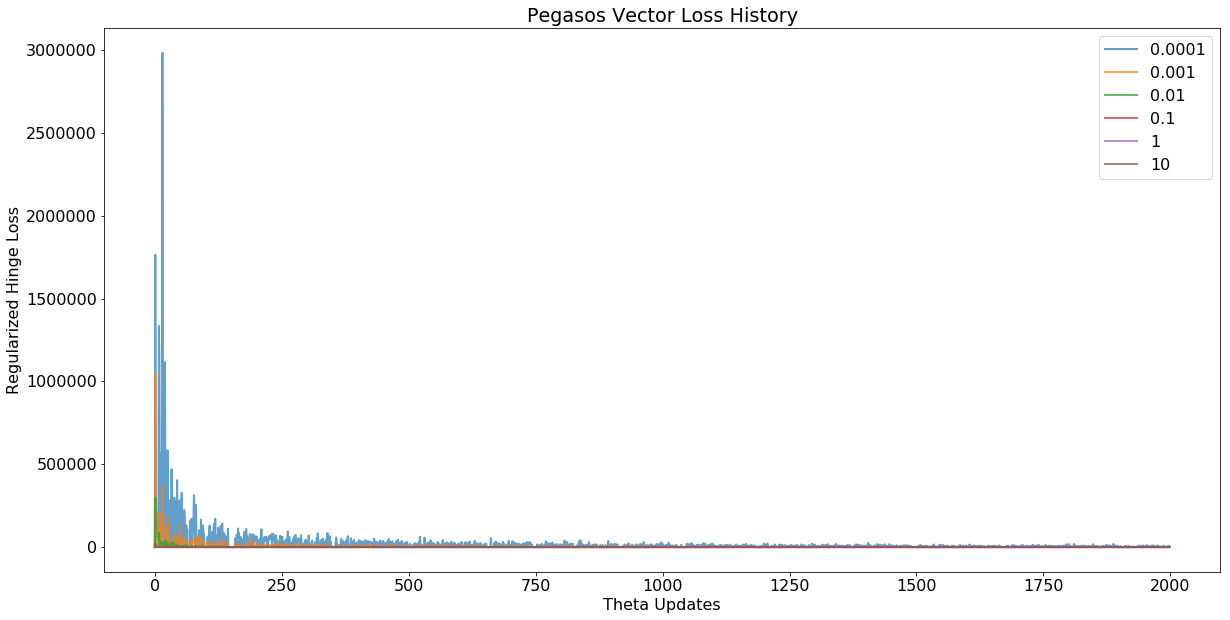

In [21]:
loss_hist_pv = {}
lambdas = [1e-4, 1e-3, 1e-2, 0.1, 1, 10]
for lambda_reg in lambdas: 
    loss_hist_pv[lambda_reg] = pegasos_vector(X, y, max_iter=2, lambda_reg=lambda_reg)[1]
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 16
plt.title('Pegasos Vector Loss History')
plt.xlabel('Theta Updates')
plt.ylabel('Regularized Hinge Loss')
for key in loss_hist_pv.keys():
    plt.plot(loss_hist_pv[key], linewidth=2, alpha=0.7, label=key)
plt.legend()

In [18]:
best_theta_fin = pegasos_vector(X_train, y_train, max_iter=6, lambda_reg=0.1)[0][5]

In [41]:
best_theta_pegasos = pegasos(X_train, y_train, max_iter=6, lambda_reg=0.1)[0][5]

In [27]:
type(best_theta_fin)

numpy.ndarray

In [23]:
np.dot(best_theta_fin, vector_rep(X_train[35]))

3.061632870864452

In [17]:
def compute_zero_one_loss(X, index_begin, index_end, y, theta):
    '''Compute the percentage 0-1 loss for a series of X,y pairs,
    single-index loss: index_begin = i, index_end = i + 1'''
    '''multiple-index loss: index_begin = i, index_end = i + n 
    Also extended to vector representations. Check the else part
    for sparse representation errors.'''

    if type(theta) == np.ndarray:
        vector_list = [vector_rep(x) for x in X[index_begin:index_end]]
        signs = [np.sign(np.dot(np.transpose(theta), A)) for A in vector_list]
#         print (signs)
        y=y[index_begin:index_end]
        loss_list = [np.max([0, -y[i]*signs[i]]) for i in range(len(signs))]
#         print (loss_list)
        percentage_loss = np.sum(loss_list)/len(loss_list)
    else: 
        sparse_list = [sparse_rep(x) for x in X[index_begin:index_end]]
        signs = [np.sign(dotProduct(theta, s)) for s in sparse_list]
#         print (signs)
        y=y[index_begin:index_end]
        loss_list = [np.amax([0, -y[i]*signs[i]]) for i in range(len(signs))]
#         print (loss_list)
        percentage_loss = np.sum(loss_list)/len(loss_list)
    return percentage_loss

# compute_zero_one_loss(X_val, 30,400, y_val, theta_best_pegasos)

In [18]:
def compute_overall_regularized_hinge_loss(X, y, theta, lambda_reg):
    '''Designed to be implemented on individual instances.'''
    if type(theta) == np.ndarray:
        loss = np.average(np.array([(lambda_reg/2)*(np.dot(theta, theta)) + \
            (np.amax([0, 1-(y[i]*(np.dot(theta, vector_rep(X[i]))))])) for i in range(len(X))]))
#         loss = (lambda_reg/2)*(np.dot(theta, theta)) + compute_zero_one_loss(X, 0, len(X), y, theta)
    else:
        loss = np.average(np.array([compute_regularized_hinge_loss(X, i, y, theta, lambda_reg) for i in range(len(X))]))
    return loss

In [76]:
compute_overall_regularized_hinge_loss(X_val, y_val, best_theta_pegasos, 0.01)

1.4580925624866385

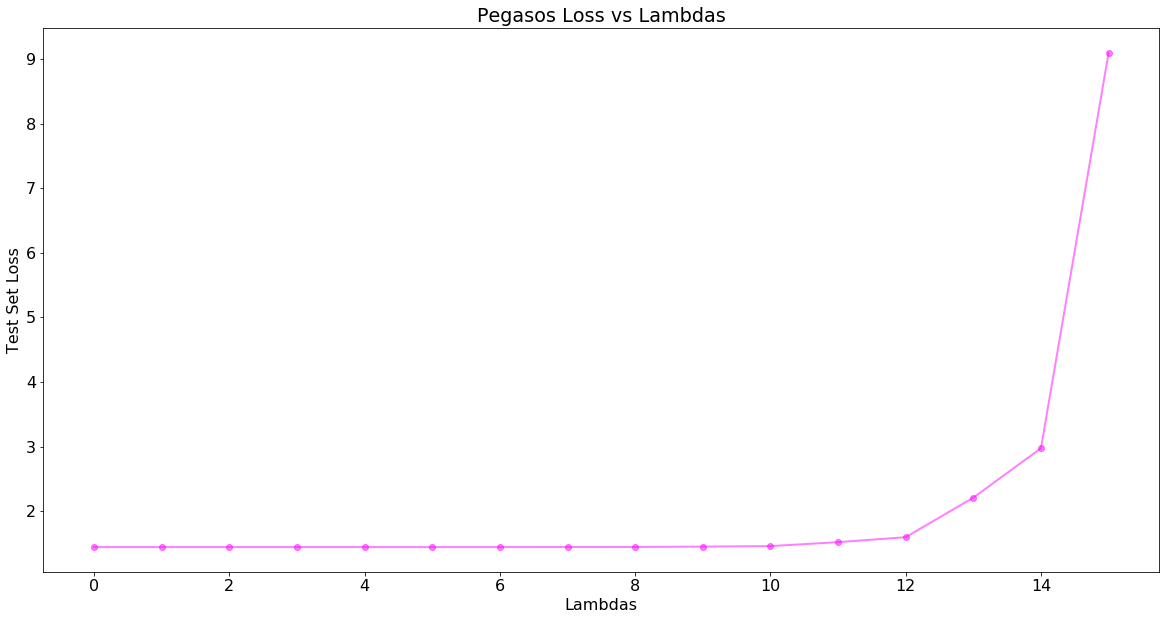

In [77]:
lambdas = [1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 5]
lambda_losses = []
for lambda_reg in lambdas:
    lambda_losses.append(compute_overall_regularized_hinge_loss(X_val, y_val, best_theta_pegasos, lambda_reg))
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 16
plt.title('Pegasos Loss vs Lambdas')
plt.xlabel('Lambdas')
plt.ylabel('Test Set Loss')
plt.plot(lambda_losses, color='magenta', marker='o', alpha=0.5, linewidth=2)


1e-10  2.98492369264
1e-09  2.98492369264
1e-08  2.9849236927
1e-07  2.98492369324
1e-06  2.98492369867
1e-05  2.98492375299
0.0001  2.98492429621
0.001  2.98492972841
0.01  2.98498405033


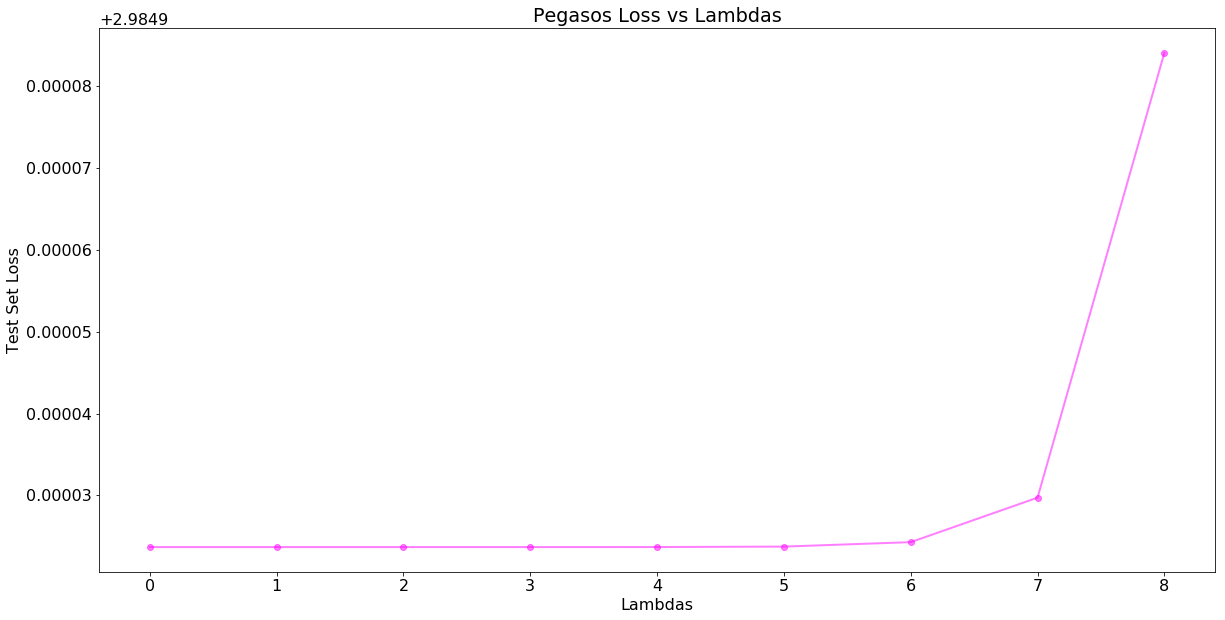

In [81]:
lambdas = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
lambda_losses = []
for x in lambdas:
    lambda_losses.append(compute_overall_regularized_hinge_loss(X_val, y_val, best_theta_fin, x))
    print (str(x)+ '  '+ str(compute_overall_regularized_hinge_loss(X_val, y_val, best_theta_fin, x)))
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 16
plt.title('Pegasos Loss vs Lambdas')
plt.xlabel('Lambdas')
plt.ylabel('Test Set Loss')
plt.plot(lambda_losses, color='magenta', marker='o', alpha=0.5, linewidth=2)

In [82]:
lambda_list = np.linspace(0.00007, 0.00015, 50)
lambda_list

array([  7.00000000e-05,   7.16326531e-05,   7.32653061e-05,
         7.48979592e-05,   7.65306122e-05,   7.81632653e-05,
         7.97959184e-05,   8.14285714e-05,   8.30612245e-05,
         8.46938776e-05,   8.63265306e-05,   8.79591837e-05,
         8.95918367e-05,   9.12244898e-05,   9.28571429e-05,
         9.44897959e-05,   9.61224490e-05,   9.77551020e-05,
         9.93877551e-05,   1.01020408e-04,   1.02653061e-04,
         1.04285714e-04,   1.05918367e-04,   1.07551020e-04,
         1.09183673e-04,   1.10816327e-04,   1.12448980e-04,
         1.14081633e-04,   1.15714286e-04,   1.17346939e-04,
         1.18979592e-04,   1.20612245e-04,   1.22244898e-04,
         1.23877551e-04,   1.25510204e-04,   1.27142857e-04,
         1.28775510e-04,   1.30408163e-04,   1.32040816e-04,
         1.33673469e-04,   1.35306122e-04,   1.36938776e-04,
         1.38571429e-04,   1.40204082e-04,   1.41836735e-04,
         1.43469388e-04,   1.45102041e-04,   1.46734694e-04,
         1.48367347e-04,

In [86]:
## zooming in
lambda_list = np.linspace(0.00095, 0.015, 20)

lambda_losses = []
for x in lambda_list:
    loss = compute_overall_regularized_hinge_loss(X_val, y_val, best_theta_fin, x)
    lambda_losses.append(loss)
    print (loss)
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 16
plt.title('Pegasos Loss vs Lambdas')
plt.xlabel('Lambdas')
plt.ylabel('Test Set Loss')
plt.plot(lambda_losses, color='crimson', marker='o', alpha=0.5, linewidth=3)

2.98492942662
2.98493388991
2.9849383532
2.9849428165
2.98494727979
2.98495174308
2.98495620637
2.98496066967
2.98496513296


KeyboardInterrupt: 

In [87]:
theta_final_1 = pegasos(X_train, y_train, lambda_reg=1, max_iter=2)[0][1]
theta_final_01 = pegasos(X_train, y_train, lambda_reg=0.1, max_iter=2)[0][1]
theta_final_001 = pegasos(X_train, y_train, lambda_reg=0.01, max_iter=2)[0][1]
theta_final_0001 = pegasos(X_train, y_train, lambda_reg=0.001, max_iter=2)[0][1]

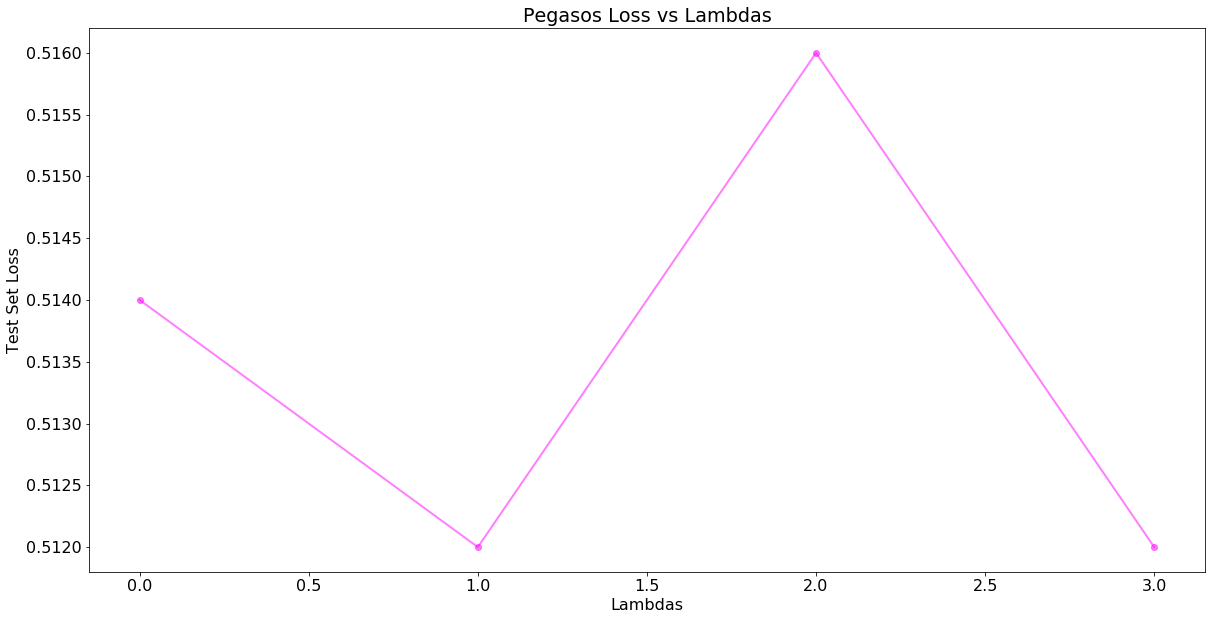

In [88]:
thetas = [theta_final_1,theta_final_01,theta_final_001,theta_final_0001]
losses = []
for theta in thetas:
    loss = compute_zero_one_loss(X_val, 0, len(X_val), y_val, theta)
    losses.append(loss)
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 16
plt.title('Pegasos Loss vs Lambdas')
plt.xlabel('Lambdas')
plt.ylabel('Test Set Loss')
plt.plot(losses, color='magenta', marker='o', alpha=0.5, linewidth=2)
    

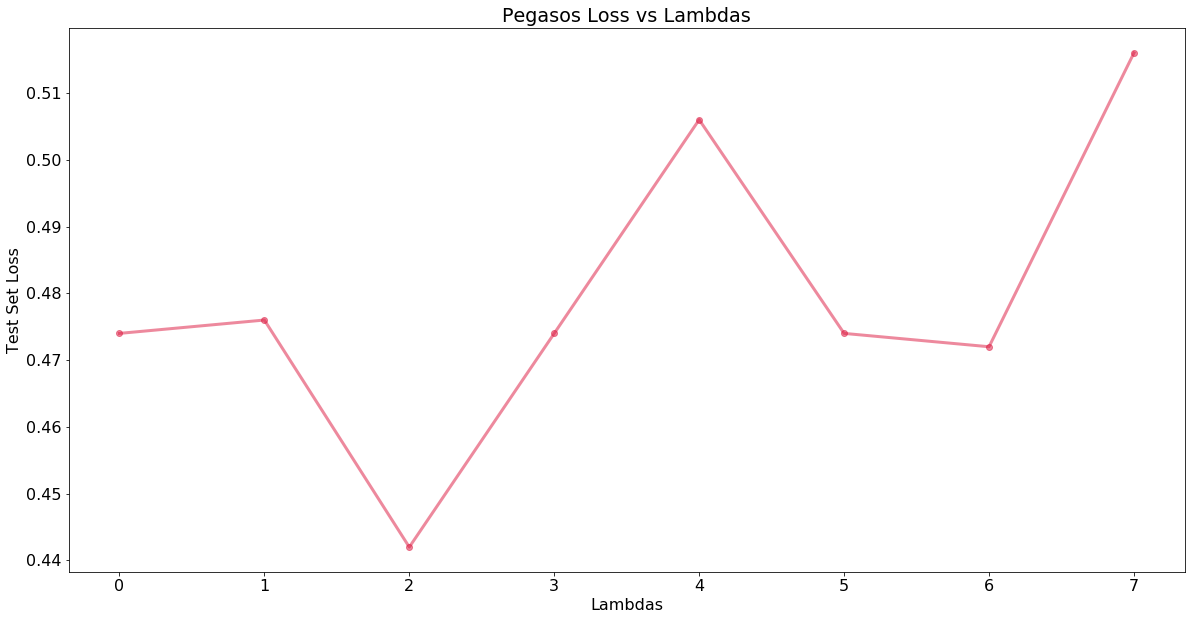

In [19]:
### 0.1
theta_list = []
for s in np.linspace(0.05, 0.15, 8):
    theta_best = pegasos(X_train, y_train, lambda_reg=s, max_iter=2)[0][1]
    theta_list.append(theta_best)

losses = []
for theta in theta_list:
    losses.append(compute_zero_one_loss(X_val, 0, len(X_val), y_val, theta))

plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 16
plt.title('Pegasos Loss vs Lambdas')
plt.xlabel('Lambdas')
plt.ylabel('Test Set Loss')
plt.plot(losses, color='crimson', marker='o', alpha=0.5, linewidth=3)


In [25]:
np.linspace(0.05, 0.15, 8)[2]

0.07857142857142857

In [26]:
xs = [sparse_rep(x) for x in X_val]


In [27]:
theta_list[2]

{4: 0.12735763236096806,
 5: -0.63678816180483822,
 8: -0.67075019710109751,
 14: 0.084905088240646506,
 20: -1.0018800412396147,
 21: 0.10188610588877324,
 23: -0.076414579416581654,
 24: 0.54339256474012909,
 28: 0.33112984413851576,
 30: 0.042452544120322518,
 32: -0.15282915883316159,
 33: 0.28018679119412943,
 35: 0.34811086178664574,
 38: -0.35660137061070984,
 39: -0.89150342652677328,
 41: 0.16131966765722561,
 51: 0.34811086178664524,
 53: 0.0084905088240646038,
 54: 0.067924070592516164,
 62: 0.38207289708290326,
 64: -0.16981017648129232,
 69: -0.11037661471283819,
 78: 0.10188610588877491,
 79: 0.033962035296258013,
 82: -0.19528170295348402,
 83: 0.11037661471283862,
 85: 0.093395597064709901,
 89: -0.059433561768451479,
 90: -0.084905088240645327,
 101: 0.15282915883316125,
 104: 0.44999696767542002,
 109: -0.31414882649038733,
 117: 0.11886712353690335,
 118: 0.26320577354600067,
 126: 0.0509430529443873,
 132: -0.22924373824974262,
 135: -0.21226272060161316,
 136: 0.15

In [28]:
sign_list = [np.sign(dotProduct(theta_list[2], i)) for i in xs]

In [29]:
sign_list

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,


In [36]:
## koyma

xlist = [sparse_rep(x) for x in X_val]
sign_list = [np.sign(dotProduct(theta_list[2], i)) for i in xlist]
losseslist = [np.amax([0, -y[i]*sign_list[i]]) for i in range(len(sign_list))]
len(np.where([losseslist[i] != sign_list[i] for i in range(len(losseslist))])[0])

475

In [37]:
## koyma

wrong_pred_1 = X_val[np.where\
                     ([losses[i] != sign_list[i] \
                       for i in range(len(losses))])[0][58]]
wrong_pred_2 = X_val[np.where\
                     ([losses[i] != sign_list[i] \
                       for i in range(len(losses))])[0][5]]

In [49]:
wrong_pred_1

["it's",
 'an',
 'interesting',
 'premise',
 '\nour',
 'reality',
 'is',
 'only',
 'real',
 'to',
 'us',
 'because',
 'it',
 'is',
 'what',
 'we',
 'perceive',
 'to',
 'be',
 'real',
 '\nin',
 'truth',
 'our',
 'entire',
 'existences',
 'are',
 'lived',
 'out',
 'in',
 'our',
 'minds',
 'as',
 'we',
 'are',
 'fed',
 'information',
 'through',
 'electronic',
 'inputs',
 'directly',
 'to',
 'our',
 'brains',
 '\nwhat',
 'we',
 'see',
 'what',
 'we',
 'do',
 'everything',
 'around',
 'us',
 'is',
 'nothing',
 'more',
 'than',
 'a',
 'computergenerated',
 'construct',
 'interlinked',
 'with',
 'the',
 'minds',
 'of',
 'others',
 'through',
 'a',
 'vastly',
 'powerful',
 'artificial',
 'intelligence',
 '\nour',
 'bodies',
 'severely',
 'atrophied',
 'are',
 'kept',
 'alive',
 'for',
 'the',
 'sole',
 'purpose',
 'of',
 'generating',
 'heat',
 'and',
 'electrical',
 'energy',
 'for',
 'a',
 'dominating',
 'order',
 'of',
 'machines',
 'which',
 'control',
 'the',
 'planet',
 '\nthe',
 'scifi

In [51]:
sparse_rep(wrong_pred_1).keys()

dict_keys([5, 8, 14, 15, 17, 20, 21, 23, 24, 28, 30, 32, 33, 38, 39, 51, 57, 59, 62, 64, 69, 78, 94, 99, 102, 104, 109, 112, 116, 118, 126, 135, 136, 139, 140, 141, 143, 146, 148, 150, 155, 156, 158, 159, 161, 164, 166, 168, 169, 175, 177, 182, 185, 189, 193, 202, 204, 212, 213, 220, 222, 223, 224, 229, 230, 245, 249, 256, 258, 265, 269, 272, 276, 277, 292, 294, 297, 298, 299, 304, 310, 313, 314, 318, 325, 328, 331, 332, 334, 335, 338, 343, 345, 349, 351, 352, 355, 356, 357, 358, 372, 374, 377, 379, 382, 391, 404, 416, 431, 436, 442, 443, 444, 450, 451, 461, 481, 483, 484, 488, 496, 501, 502, 511, 514, 518, 521, 536, 542, 580, 584, 599, 607, 608, 611, 617, 621, 631, 634, 636, 654, 686, 692, 717, 725, 729, 730, 734, 747, 749, 754, 767, 773, 787, 797, 808, 809, 820, 827, 834, 874, 876, 898, 900, 907, 924, 937, 942, 959, 988, 1030, 1063, 1084, 1105, 1134, 1142, 1188, 1203, 1221, 1229, 1234, 1236, 1259, 1287, 1290, 1291, 1304, 1363, 1364, 1366, 1369, 1404, 1428, 1438, 1440, 1490, 1497, 152

In [58]:
[theta_list[2][i] for i in (sparse_rep(wrong_pred_1)).keys()]

[-0.63678816180483822,
 -0.67075019710109751,
 0.084905088240646506,
 0.12735763236096737,
 -0.016981017648129076,
 -1.0018800412396147,
 0.10188610588877324,
 -0.076414579416581654,
 0.54339256474012909,
 0.33112984413851576,
 0.042452544120322518,
 -0.15282915883316159,
 0.28018679119412943,
 -0.35660137061070984,
 -0.89150342652677328,
 0.34811086178664524,
 0.12735763236096787,
 -0.26320577354600011,
 0.38207289708290326,
 -0.16981017648129232,
 -0.11037661471283819,
 0.10188610588877491,
 0.11037661471283872,
 -0.38207289708290382,
 -0.067924070592516289,
 0.44999696767542002,
 -0.31414882649038733,
 0.016981017648128954,
 -0.059433561768451867,
 0.26320577354600067,
 0.0509430529443873,
 -0.21226272060161316,
 0.15282915883316192,
 0.3226393353144511,
 -0.24622475589787152,
 -0.2207532294256779,
 1.174103435481674e-16,
 0.3311298441385167,
 -0.49244951179574198,
 0.1103766147128387,
 -0.16981017648129049,
 -0.50943052944387124,
 -1.2905573412578097,
 -0.12735763236096784,
 0.4075

In [63]:
df = pd.DataFrame([pd.Series([theta_list[2][i]*\
                              sparse_rep(wrong_pred_1)[i]\
                              for i in (sparse_rep(wrong_pred_1)).keys()]), \
                   pd.Series([theta_list[2][i]*\
                              sparse_rep(wrong_pred_2)[i] \
                              for i in (sparse_rep(wrong_pred_2)).keys()])])

In [65]:
df = df.T
df

,0,1
0,-2.419795e+01,-1.273576e+01
1,-2.683001e+00,-2.683001e+00
2,1.358481e+00,8.490509e-01
3,1.273576e-01,-8.015040e+00
4,-1.698102e-02,1.630178e+00
5,-2.003760e+00,-1.604706e+00
6,2.649039e+00,2.227910e+01
7,-2.903754e+00,1.655649e+00
8,2.988659e+01,1.273576e-01
9,3.642428e+00,3.642428e+00


In [78]:
print (wrong_pred_1[8])
print (wrong_pred_1[12])
print (wrong_pred_1[9])
print (wrong_pred_1[184])
print (wrong_pred_1[6])
print (wrong_pred_1[33])
print (wrong_pred_1[25])
print (wrong_pred_1[15])

real
it
to
that
is
are
are
we


In [79]:
print (wrong_pred_2[6])
print (wrong_pred_2[9])
print (wrong_pred_2[12])
print (wrong_pred_2[25])
print (wrong_pred_2[20])
print (wrong_pred_2[7])
print (wrong_pred_2[4])
print (wrong_pred_2[85])

school
smith
day
anderson
slackers
dropout
from
viewers


In [81]:
df.sort_values(0, ascending=True)

,0,1
0,-24.197950,-1.273576e+01
42,-9.033901,-1.103766e-01
52,-7.335800,-1.867912e-01
48,-5.646188,3.396204e-02
92,-4.160349,-2.462248e-01
38,-3.447147,-1.188671e-01
19,-3.396204,2.207532e-01
7,-2.903754,1.655649e+00
1,-2.683001,-2.683001e+00
5,-2.003760,-1.604706e+00


In [80]:
df.sort_values(1, ascending=True)

,0,1
0,-2.419795e+01,-12.735763
3,1.273576e-01,-8.015040
36,1.174103e-16,-5.646188
33,2.581115e+00,-5.162229
39,1.103766e-01,-4.890533
13,-3.566014e-01,-3.566014
1,-2.683001e+00,-2.683001
67,-2.207532e-01,-2.080175
5,-2.003760e+00,-1.604706
95,1.698102e-02,-1.375462


In [32]:
compute_zero_one_loss(X_val, 0, len(X_val), y_val, theta_list[2])

0.442

In [47]:
theta_list[2]

{4: 0.12735763236096806,
 5: -0.63678816180483822,
 8: -0.67075019710109751,
 14: 0.084905088240646506,
 20: -1.0018800412396147,
 21: 0.10188610588877324,
 23: -0.076414579416581654,
 24: 0.54339256474012909,
 28: 0.33112984413851576,
 30: 0.042452544120322518,
 32: -0.15282915883316159,
 33: 0.28018679119412943,
 35: 0.34811086178664574,
 38: -0.35660137061070984,
 39: -0.89150342652677328,
 41: 0.16131966765722561,
 51: 0.34811086178664524,
 53: 0.0084905088240646038,
 54: 0.067924070592516164,
 62: 0.38207289708290326,
 64: -0.16981017648129232,
 69: -0.11037661471283819,
 78: 0.10188610588877491,
 79: 0.033962035296258013,
 82: -0.19528170295348402,
 83: 0.11037661471283862,
 85: 0.093395597064709901,
 89: -0.059433561768451479,
 90: -0.084905088240645327,
 101: 0.15282915883316125,
 104: 0.44999696767542002,
 109: -0.31414882649038733,
 117: 0.11886712353690335,
 118: 0.26320577354600067,
 126: 0.0509430529443873,
 132: -0.22924373824974262,
 135: -0.21226272060161316,
 136: 0.15